<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project.  Only 30 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would itereate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

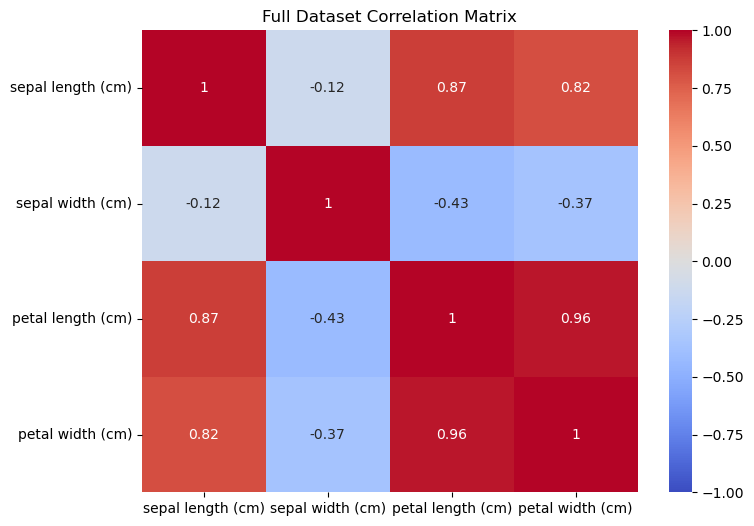

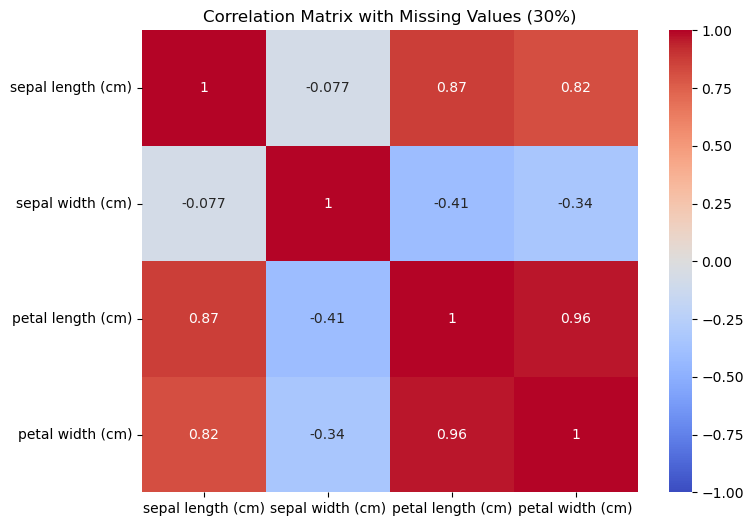

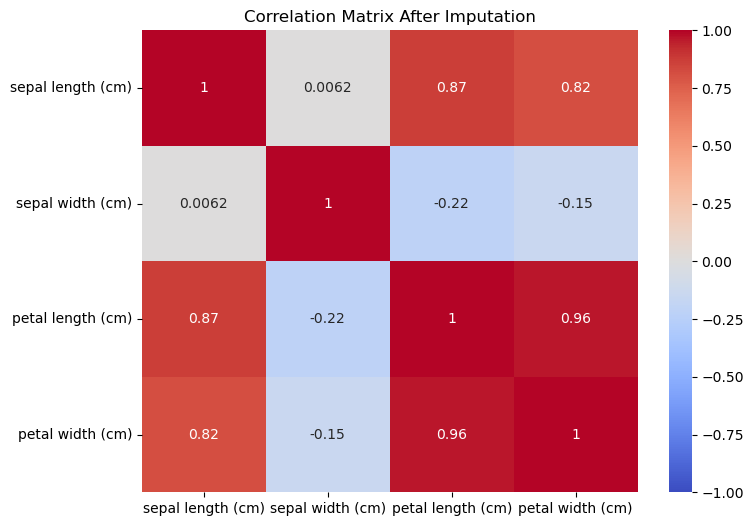

In [13]:
import numpy as np # import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris() #loading the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

# plot the correlation heatmap
def plot_heatmap(dataframe, title): # heatmap plotting function
    plt.figure(figsize=(8, 6)) #set the figure size
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
    #it plots the heatmap of the dataframe correlation values of each variable against each other, annot keyword denotes type of array, if an array-like with the
    #same shape as ``data``, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
    plt.title(title)
    # plt.show()

# full dataset correlation heatmap
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3): # this function is for introducing the missingness in the column that was chosen
    df_missing = dataframe.copy() #create a duplicate of the original dataset
    mask = np.random.rand(df_missing.shape[0]) < missing_rate #create 150 random numbers and flag only 30% of the numbers as True and rest False
    df_missing.loc[mask, column] = np.nan # select all the rows of the column that have False and mark only those rows as Nan
    return df_missing #return the dataset


df_missing = introduce_missingness_in_column(df, 'sepal width (cm)', missing_rate=0.3) #call the above function by specifying the column name and the missing rate

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)") #plot the heat map for the above changes

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing['sepal width (cm)'].mean() #get the mean and the standard deviation for the above chages in the dataset
std_val = df_missing['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['sepal width (cm)'].isna() #get the rows which have a missing value  
df_missing.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val #fill the missing indices with random numbers multipled by the standard deviation and adding with the mean value.

# heatmap after imputation
plot_heatmap(df_missing, "Correlation Matrix After Imputation")

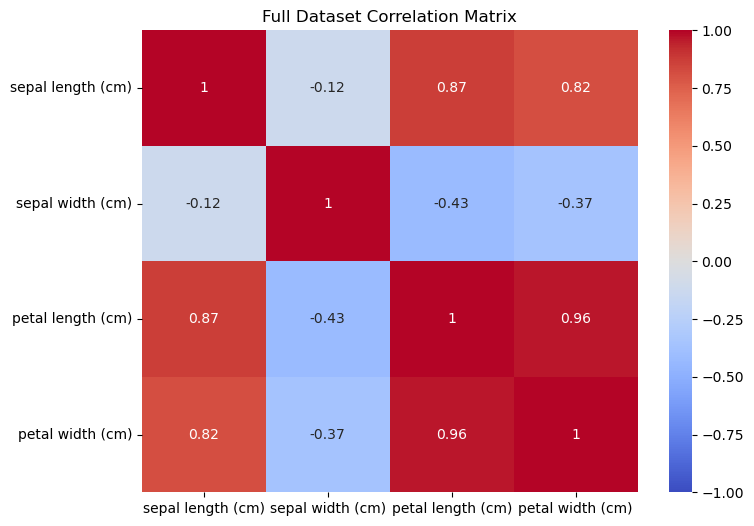

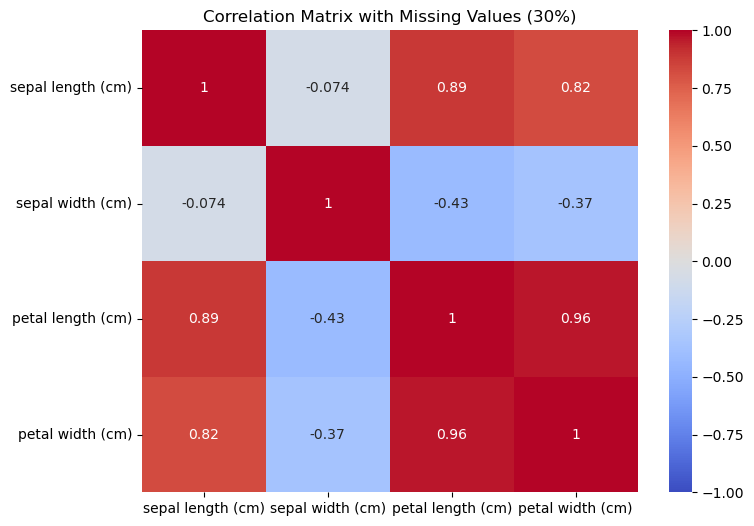

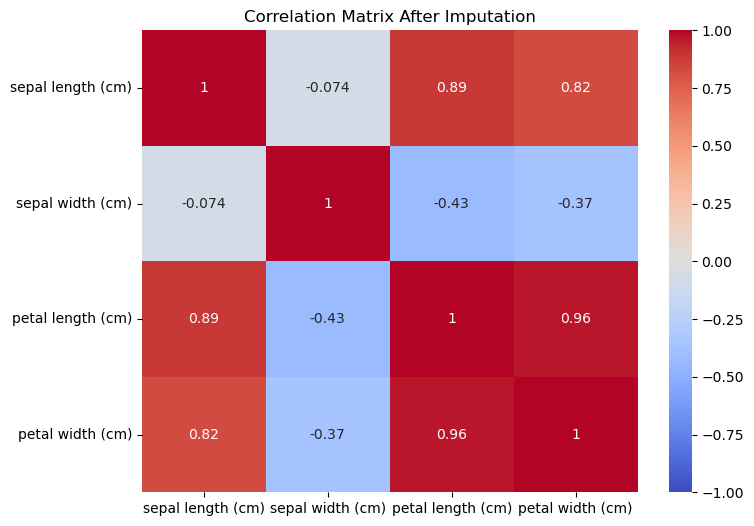

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    # plt.show()

# full dataset correlation heatmap
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3):
    df_missing = dataframe.copy()
    mask = np.random.rand(df_missing.shape[0]) < missing_rate
    df_missing.loc[mask, column] = np.nan
    return df_missing

df_missing = introduce_missingness_in_column(df, 'sepal length (cm)', missing_rate=0.3)

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)")

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing['sepal width (cm)'].mean()
std_val = df_missing['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['sepal width (cm)'].isna()
df_missing.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val

# heatmap after imputation
plot_heatmap(df_missing, "Correlation Matrix After Imputation")

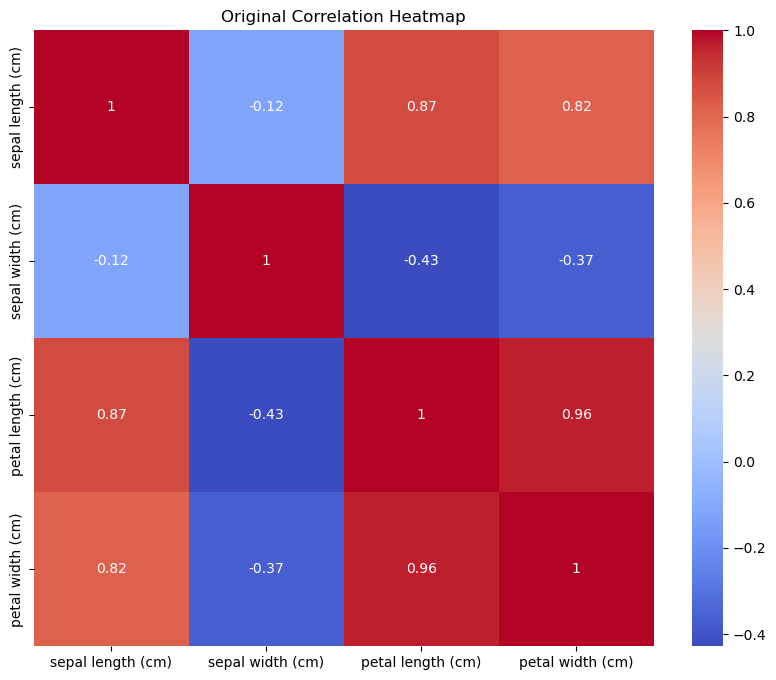


Analyzing sepal length (cm) with 20.0% missing values


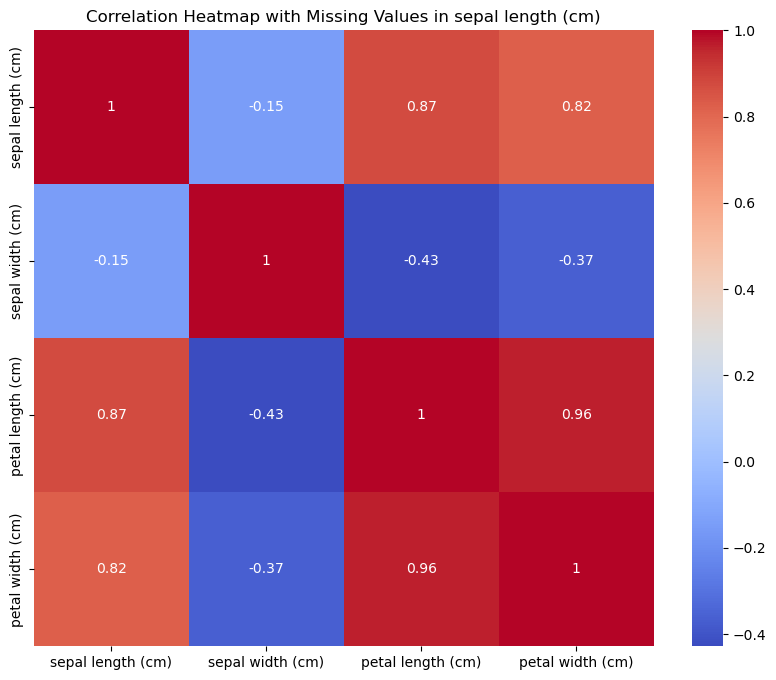

Mean of remaining values in sepal length (cm): 5.8508
Variance of remaining values in sepal length (cm): 0.6790


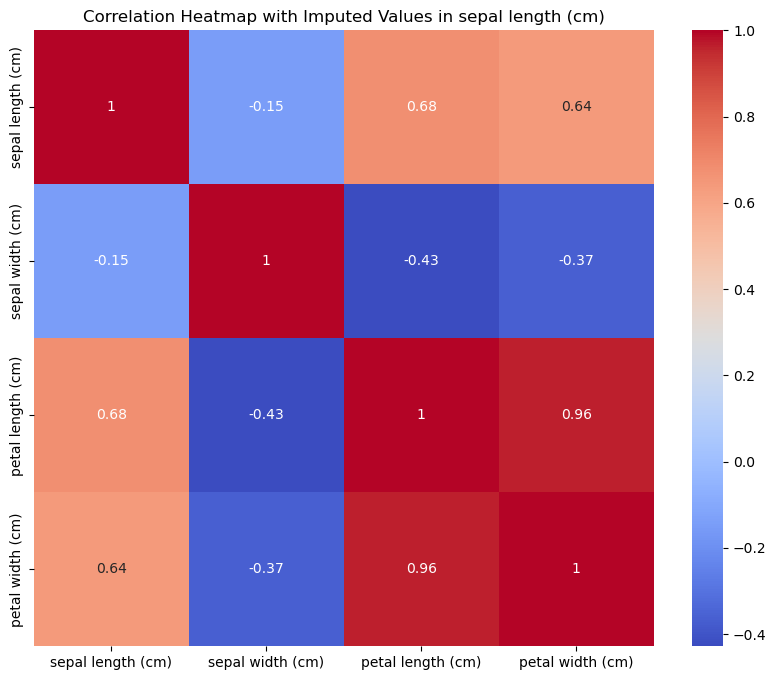


Correlation Differences (Original vs Imputed):
0.05006618096712209

Analyzing sepal length (cm) with 40.0% missing values


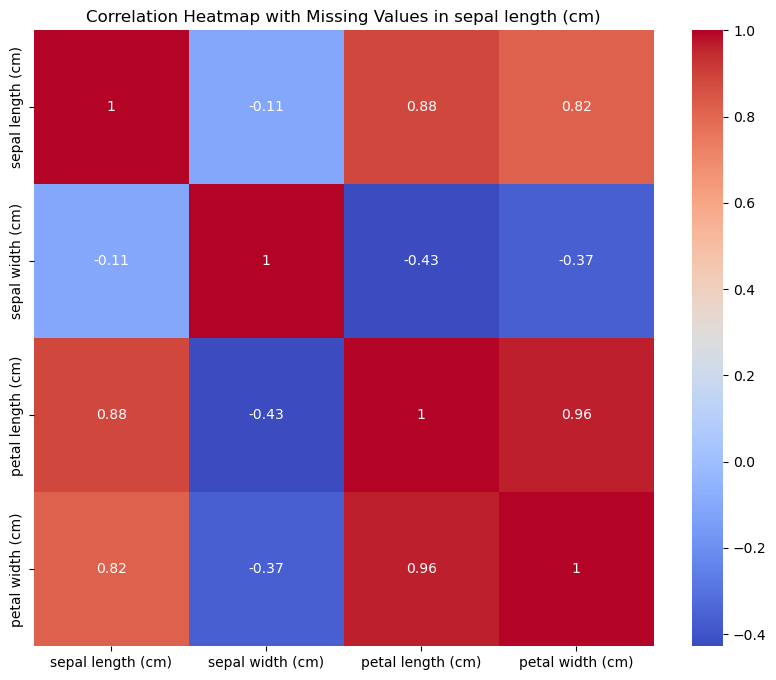

Mean of remaining values in sepal length (cm): 5.8344
Variance of remaining values in sepal length (cm): 0.7212


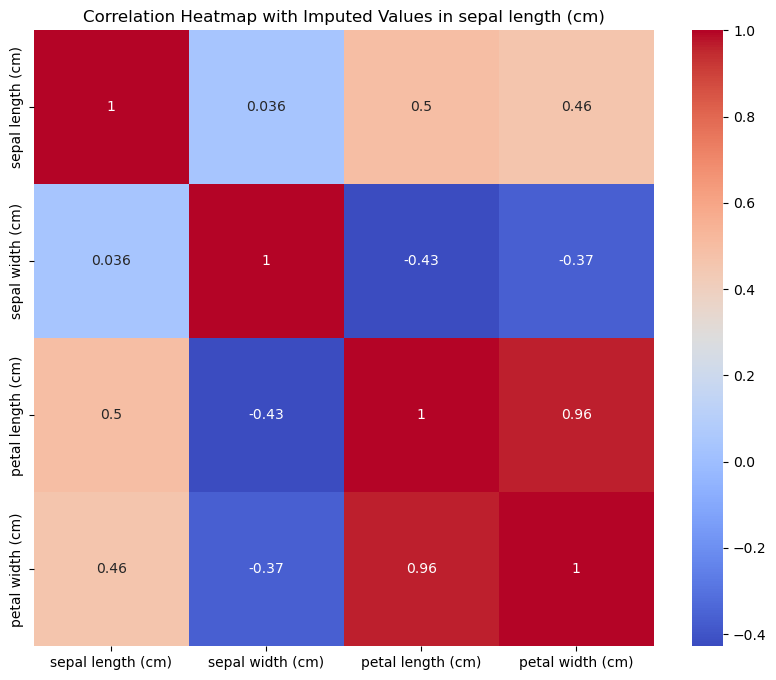


Correlation Differences (Original vs Imputed):
0.1105493641949622

Analyzing sepal length (cm) with 60.0% missing values


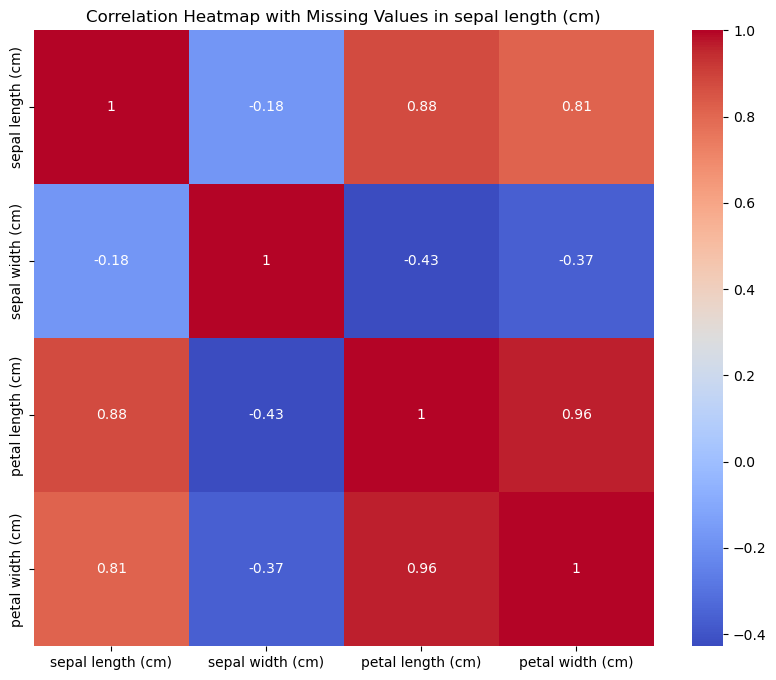

Mean of remaining values in sepal length (cm): 5.9117
Variance of remaining values in sepal length (cm): 0.7163


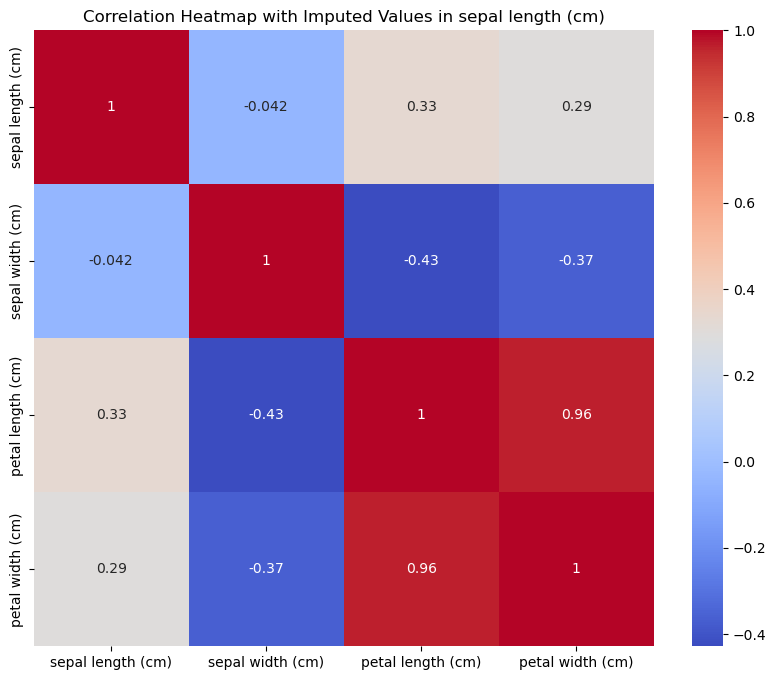


Correlation Differences (Original vs Imputed):
0.14208053737722912

Analyzing sepal width (cm) with 20.0% missing values


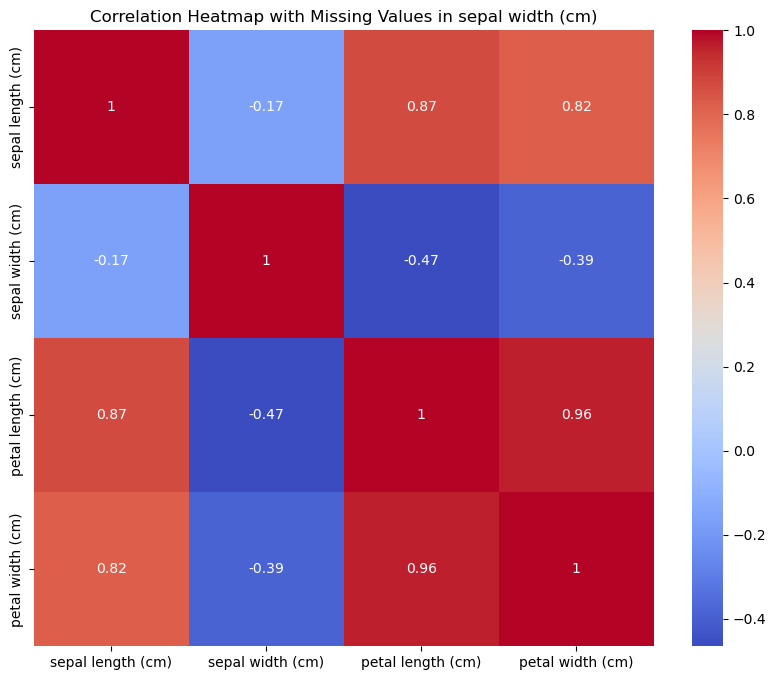

Mean of remaining values in sepal width (cm): 3.0958
Variance of remaining values in sepal width (cm): 0.1984


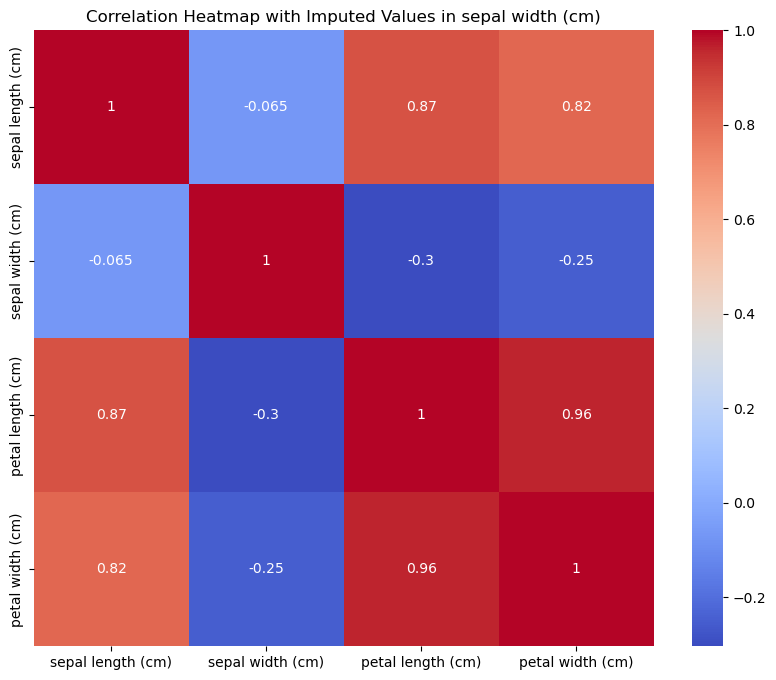


Correlation Differences (Original vs Imputed):
0.036383539470028016

Analyzing sepal width (cm) with 40.0% missing values


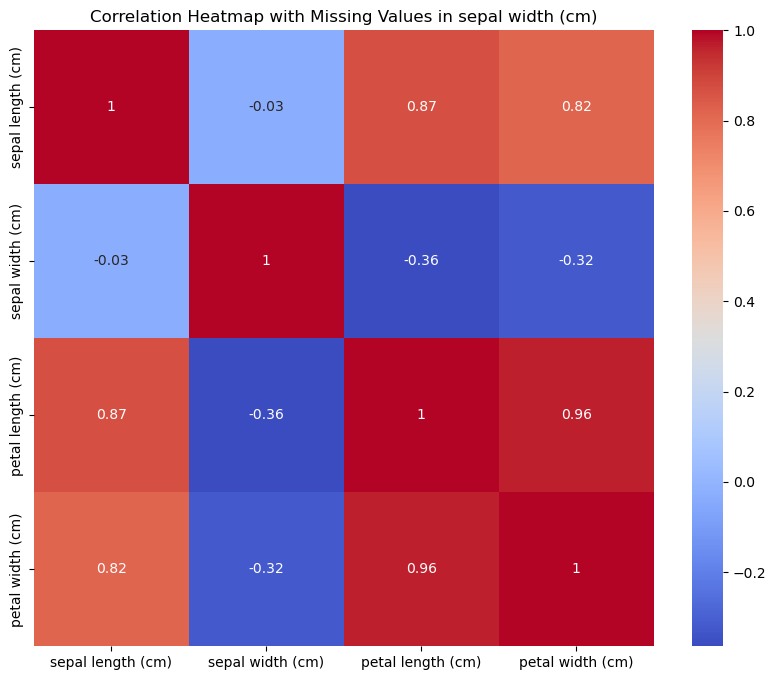

Mean of remaining values in sepal width (cm): 3.0244
Variance of remaining values in sepal width (cm): 0.2198


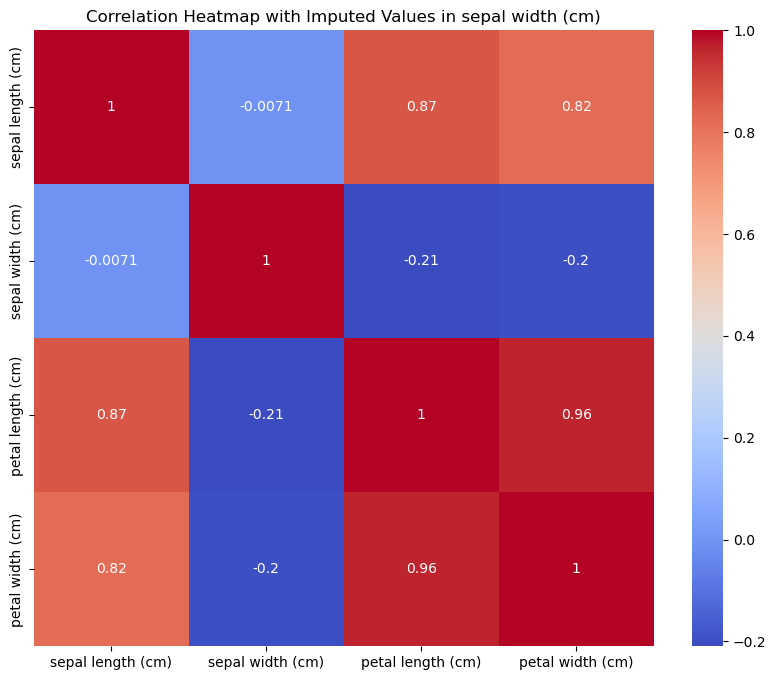


Correlation Differences (Original vs Imputed):
0.06249834272104032

Analyzing sepal width (cm) with 60.0% missing values


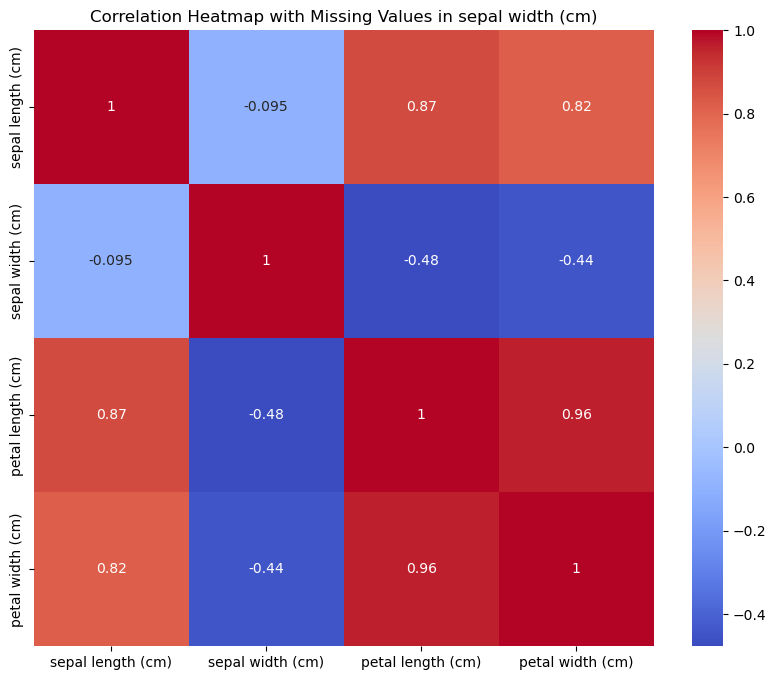

Mean of remaining values in sepal width (cm): 2.9900
Variance of remaining values in sepal width (cm): 0.2053


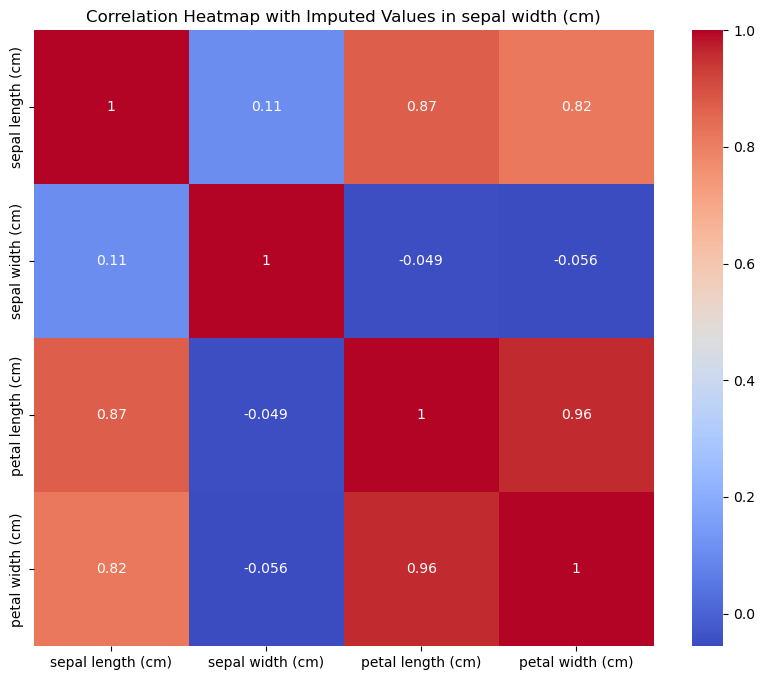


Correlation Differences (Original vs Imputed):
0.11437500610561815

Analyzing petal length (cm) with 20.0% missing values


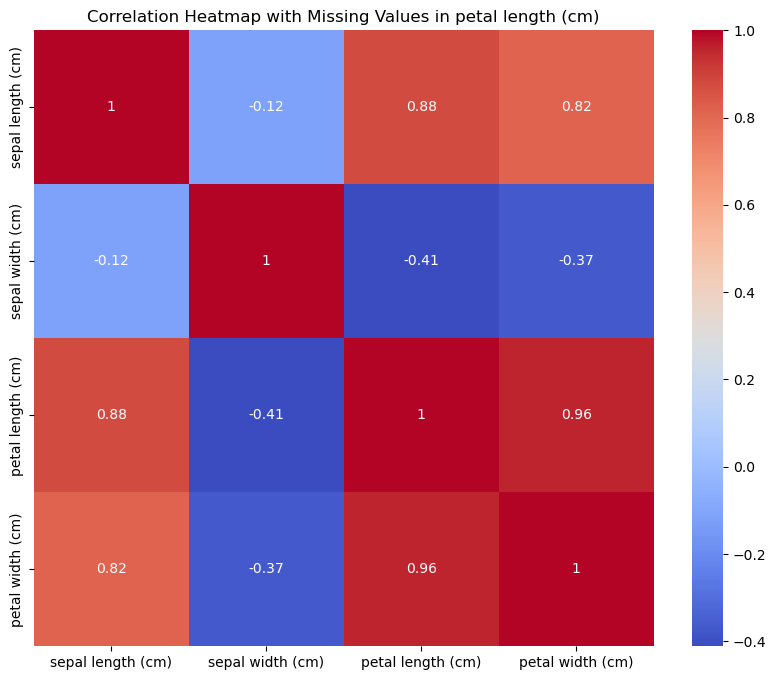

Mean of remaining values in petal length (cm): 3.7375
Variance of remaining values in petal length (cm): 3.1968


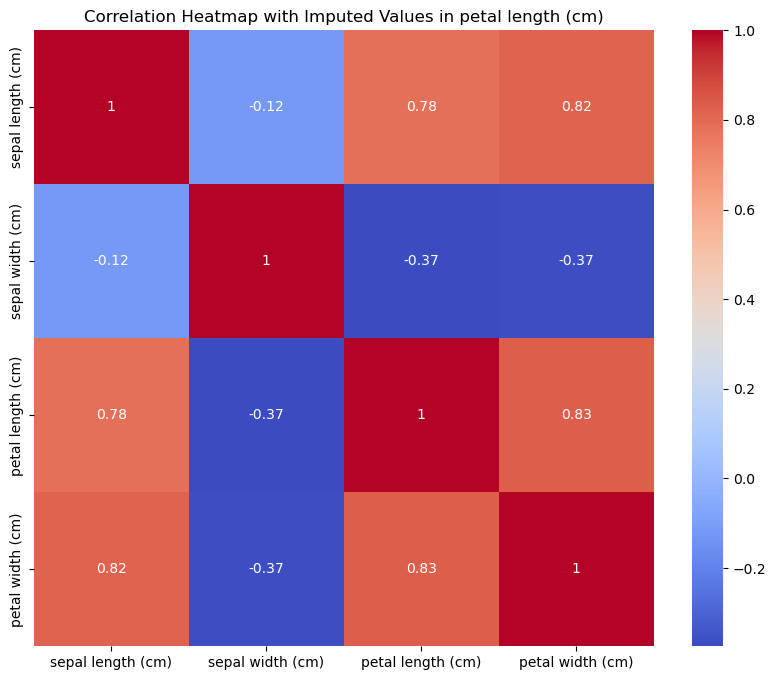


Correlation Differences (Original vs Imputed):
0.034463408229212594

Analyzing petal length (cm) with 40.0% missing values


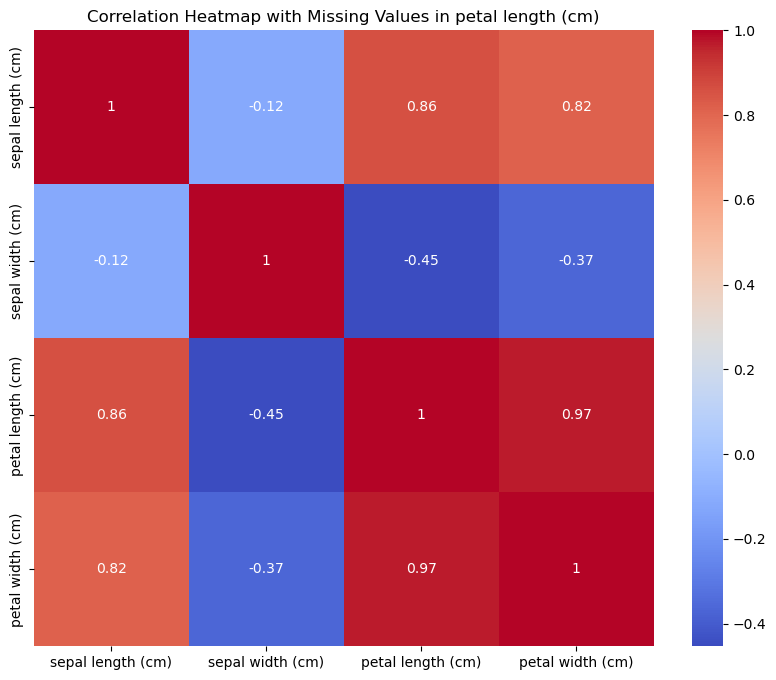

Mean of remaining values in petal length (cm): 3.5556
Variance of remaining values in petal length (cm): 3.2904


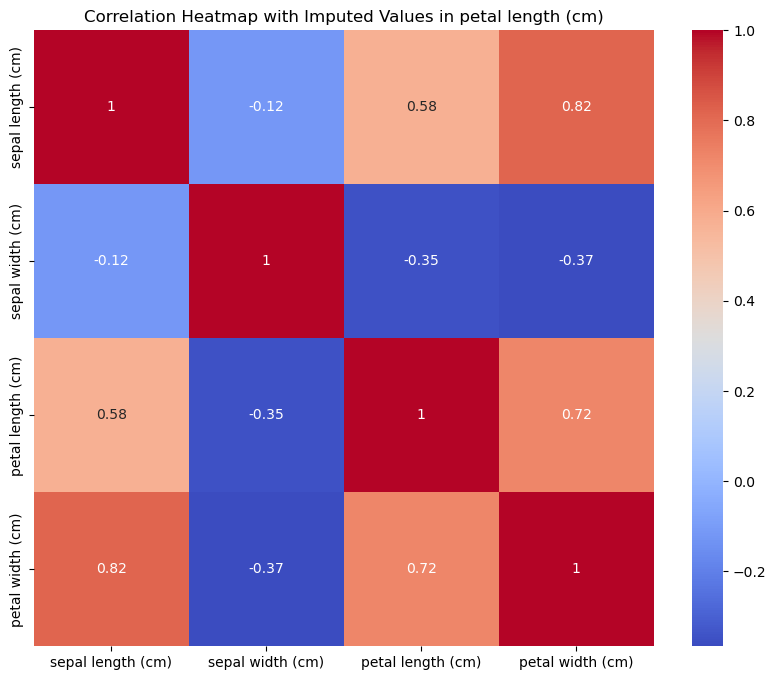


Correlation Differences (Original vs Imputed):
0.07743203300320951

Analyzing petal length (cm) with 60.0% missing values


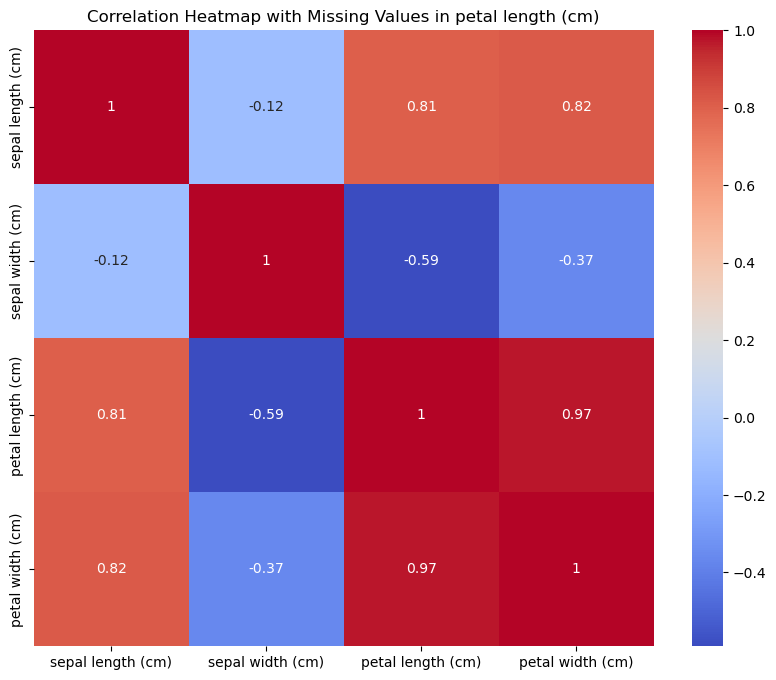

Mean of remaining values in petal length (cm): 3.4383
Variance of remaining values in petal length (cm): 3.0421


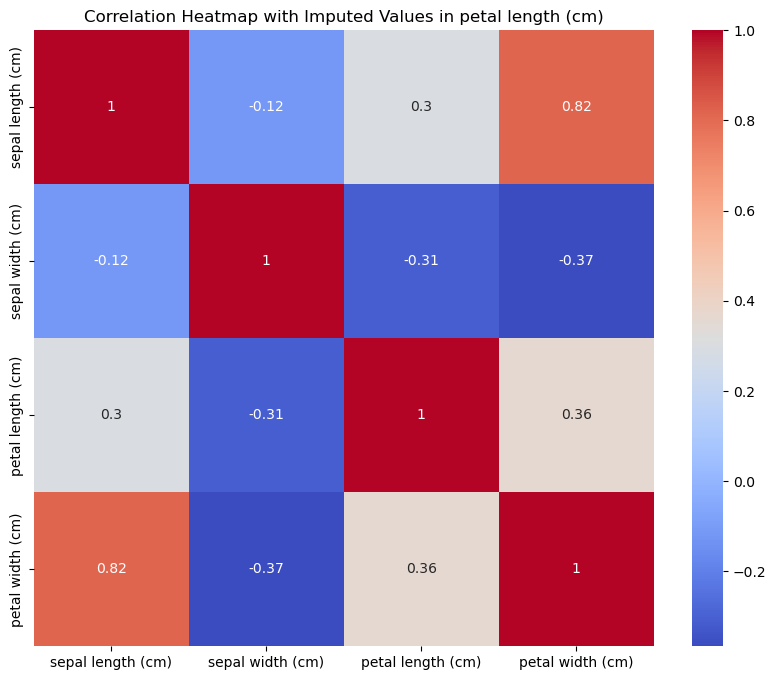


Correlation Differences (Original vs Imputed):
0.1608340242987672

Analyzing petal width (cm) with 20.0% missing values


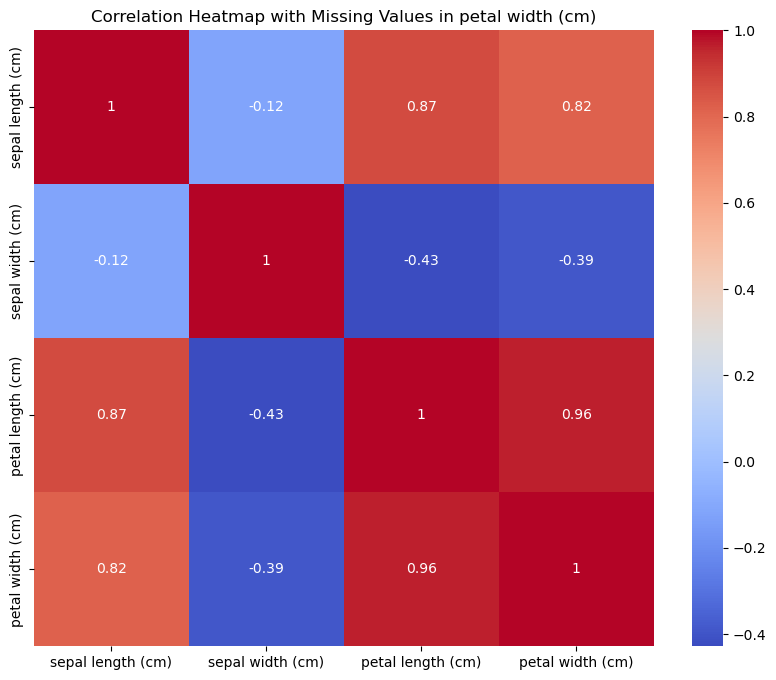

Mean of remaining values in petal width (cm): 1.1875
Variance of remaining values in petal width (cm): 0.5887


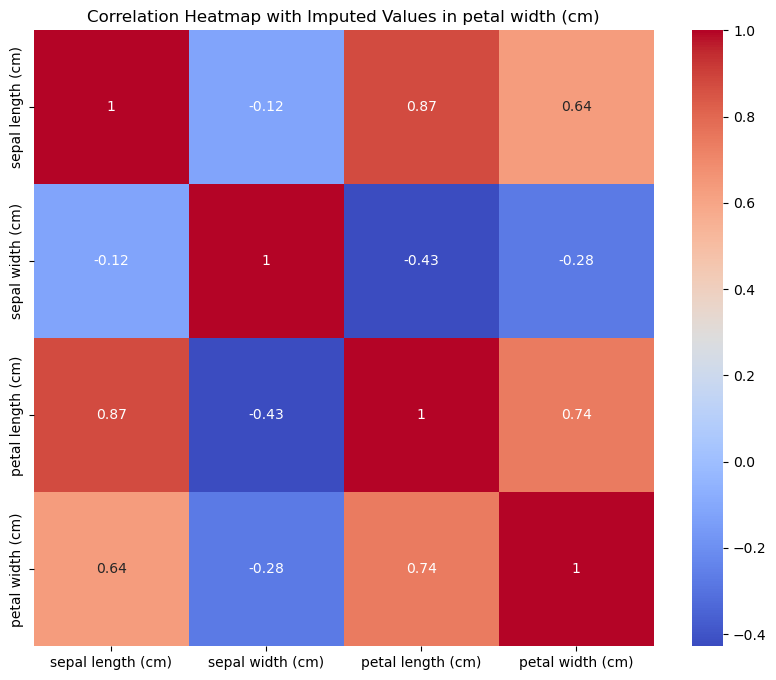


Correlation Differences (Original vs Imputed):
0.06177152063033515

Analyzing petal width (cm) with 40.0% missing values


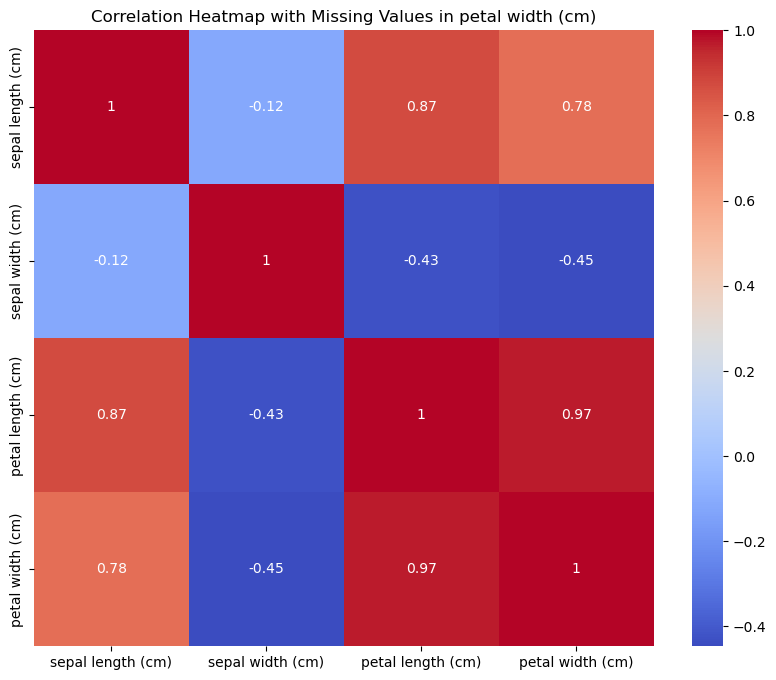

Mean of remaining values in petal width (cm): 1.1767
Variance of remaining values in petal width (cm): 0.5742


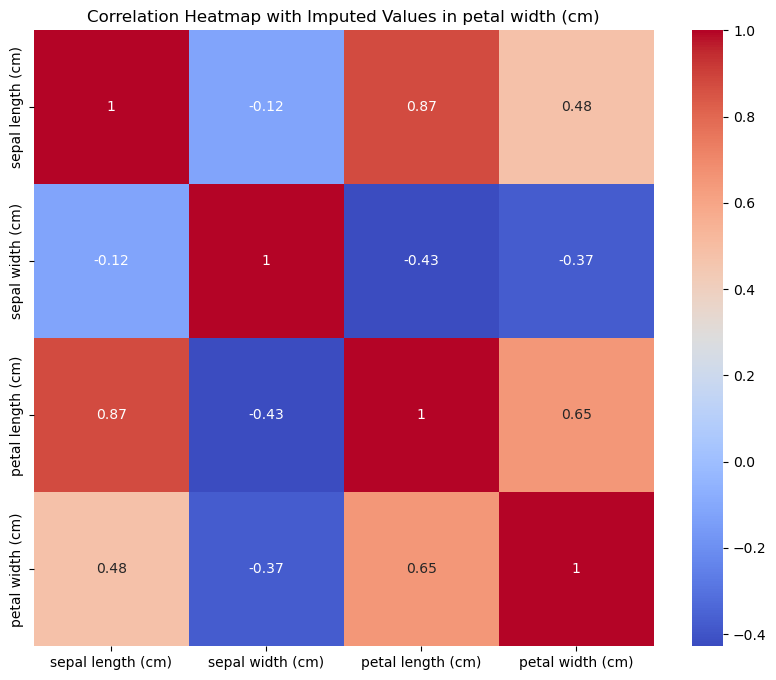


Correlation Differences (Original vs Imputed):
0.08200365034101159

Analyzing petal width (cm) with 60.0% missing values


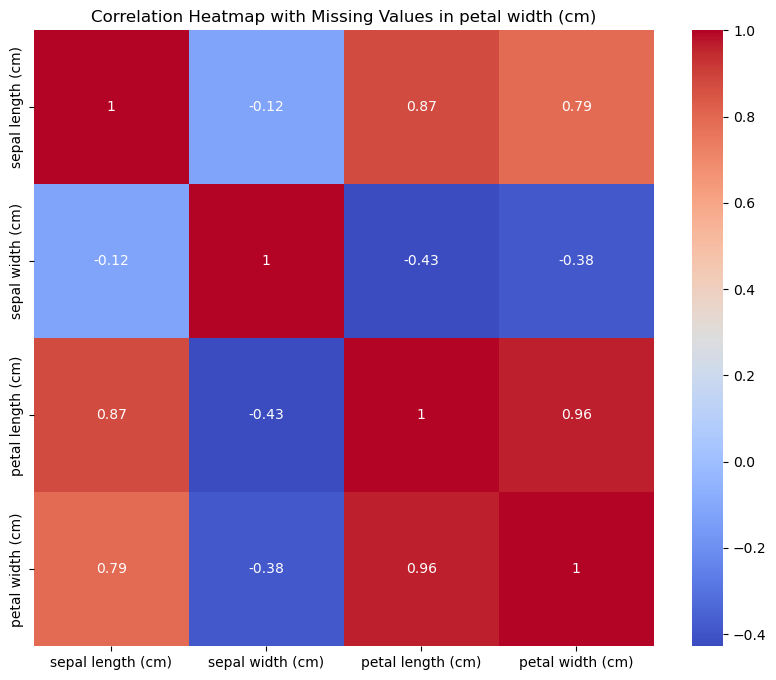

Mean of remaining values in petal width (cm): 1.3000
Variance of remaining values in petal width (cm): 0.4912


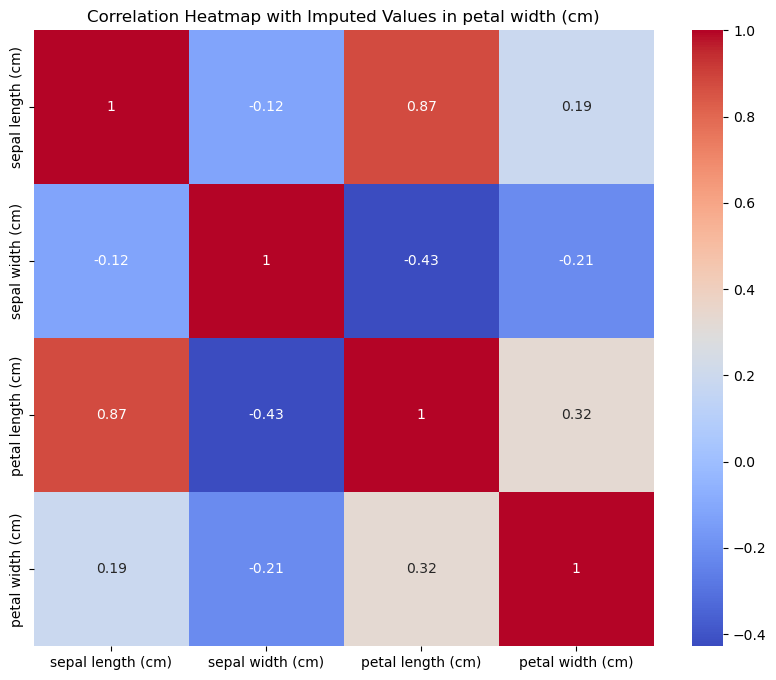


Correlation Differences (Original vs Imputed):
0.17773580159849228


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

def create_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

# Original heatmap (ground truth)
create_heatmap(df, "Original Correlation Heatmap")

def analyze_missing_data(data, column_to_modify, missing_percentage=0.3):
    # Create a copy of the dataframe
    modified_df = data.copy()
    
    # Randomly replace values with NaN
    n_missing = int(len(modified_df) * missing_percentage)
    missing_indices = np.random.choice(len(modified_df), n_missing, replace=False)
    modified_df.loc[missing_indices, column_to_modify] = np.nan
    
    # Create heatmap with missing values
    create_heatmap(modified_df, f"Correlation Heatmap with Missing Values in {column_to_modify}")
    
    # Calculate mean and variance of remaining values
    mean_val = modified_df[column_to_modify].mean()
    var_val = modified_df[column_to_modify].var()
    
    print(f"Mean of remaining values in {column_to_modify}: {mean_val:.4f}")
    print(f"Variance of remaining values in {column_to_modify}: {var_val:.4f}")
    
    # Create imputed dataframe
    imputed_df = modified_df.copy()
    imputed_values = np.random.normal(mean_val, np.sqrt(var_val), n_missing)
    imputed_df.loc[missing_indices, column_to_modify] = imputed_values
    
    # Create heatmap with imputed values
    create_heatmap(imputed_df, f"Correlation Heatmap with Imputed Values in {column_to_modify}")
    
    return modified_df, imputed_df

# Analyze different columns with different percentages
columns_to_test = iris.feature_names
percentages = [0.2, 0.4, 0.6]

for column in columns_to_test:
    for percentage in percentages:
        print(f"\nAnalyzing {column} with {percentage*100}% missing values")
        modified_df, imputed_df = analyze_missing_data(df, column, percentage)
        
        # Calculate and print correlation differences
        original_corr = df.corr()
        imputed_corr = imputed_df.corr()
        
        print("\nCorrelation Differences (Original vs Imputed):")
        print((imputed_corr - original_corr).abs().mean().mean())

The variation is seen for the correlation between petal width and sepal width, sepal length and sepal width, petal length and sepal width. 

- Some variables are more "robust" to missing data than others
- Variables with higher variance tend to be more sensitive to missing data
- Correlations between highly correlated variables are more resistant to missing data

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

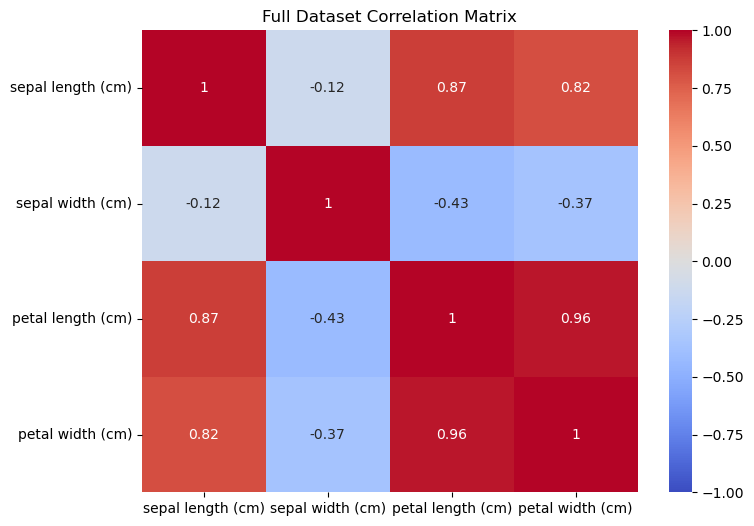

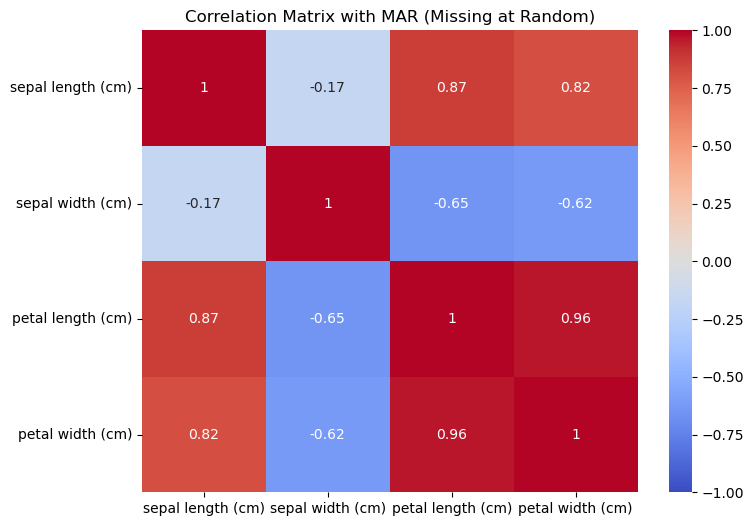

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

def plot_heatmap(dataframe, title): #plot the heatmap before introducing missingness
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(df, "Full Dataset Correlation Matrix")

# MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold): 
    '''In this function instead 
    of introducing missingness by random, we consider a specific situation where we can introduce
    missingness in a column based on a dfferent variable'''
    df_mar = dataframe.copy() #create a copy of the dataset
    
    # 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold 
    '''we choose the column of the reference column(petal length) and mask variables that are above a certain threshold that they 
    can be flaged as True and the rest as False'''
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan 
    '''in the new dataset, the mask is applied, all the rows in 'column_to_remove' corresponding to True values will be filling with 
    nan values'''
    return df_mar

# set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5) # by giving the parameters, call the above function.

# heatmap with MAR
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)") #plot the heatmap after the above function (imputation). 

In the above test the only place that had a difference in the correlation matrix is the sepal width against all other variables except itself which was 1.

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


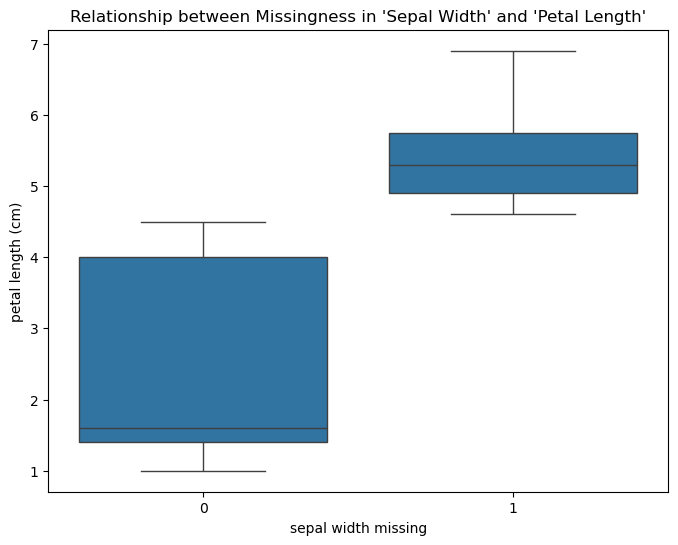

In [72]:
import numpy as np # import the necessary items and libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr

# Load the Iris dataset
iris = datasets.load_iris() #load iris dataset for performing data analysis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold): #this function is very similar to the previous code
    df_mar = dataframe.copy() #df_mar is an dataset that is a copy of dataframe
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold #if the values are greater than the threhold, they will be a True in flag column. 
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan #mark all the rows as nan in sepal_width if the corresponding mask is True
    return df_mar

# Set 'petal length' threshold for MAR
# Set 'petal length' threshold for MAR and create new DataFrame with missing values
# We choose 4.5 as threshold - this value can be adjusted based on data distribution

df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)

# 2. Add an indicator column for missingness in 'sepal width'
# This converts True/False (is missing) to 1/0 for easier analysis
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int) 

# 3. Check for correlation between 'sepal width missing' and 'petal length'
# Calculate correlation between missingness and 'petal length'
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
 # Set figure size for better visibility
# Create boxplot showing relationship between missingness and petal length
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

IN this graph of comparing the quartiles between the missingness between sepal width missing and sepal width not missing after imputation, I understood that the median was too less. 
In the actual boxplot created by the code:

The box for '0' (non-missing) shows the distribution of petal lengths where sepal width is present
The box for '1' (missing) shows the distribution of petal lengths where sepal width is missing
Because we set the threshold at 4.5, we should see:

Most or all petal lengths below 4.5 in the '0' box
Most or all petal lengths above 4.5 in the '1' box

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Projects</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Use all of your extra time to work on your project. Your project is due at midnight, October 19. Here are some thoughts to keep in mind:
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>All of your projects will be quite different from each other.</li>
    <li>It is important that there is a point, a goal.</li>
    <li>If things don't work out, you can change your project for the final; this of this first project as a practice project.</li>
    <li>The main goal of the midterm project is to ensure you are using all of the technqiues we have learned so far, which means there will be a lot more to do for the final project. Your project may not feel "done" at this stage.</li>
    <li>Go through the lectures to remind your self of what you should be thinking about: scaling, transforming, encoding, imputing, developing a narrative, visualization, Streamlit web apps, and so on.....</li>
    <li>Use as many of these techniques as you can, provided they are relevant to your goals. (As I wrote, all projects are different.... But, there are some basics everyone will have: a basic working web app, well crafted visualizations, a dataset that is properly ready to do something, and some initial results.</li>
    <li>It is best to think of the projects as something you are doing for work, not a class. Don't write it to you, don't write it to me and don't write it to Max. Picture this as something that would be deployed into the real world to someone you have never met. 
  </ul>

  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>